### Importing relevant packages

In [2]:
import re
import matplotlib.pyplot as plt
import string
from nltk.tokenize.treebank import TreebankWordDetokenizer
from gensim.utils import simple_preprocess
import gensim
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import nltk

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers.wrappers import Bidirectional

In [4]:
import pandas
import pickle
import bz2
import _pickle as cPickle
import zipfile
from tqdm import tqdm

In [7]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

# Loading training data

In [5]:
train=pd.read_pickle(r'C:\Users\chriq\OneDrive\Documents\my_data\MLdata\train_set.zip' )

# Trying LDA to vectorize corpus

In [8]:
train

,obfuscated_bool,js,obfuscator_name,js_length,num_spaces,num_parenthesis,num_slash,num_plus,num_point,num_comma,...,num_numeric,ratio_spaces,ratio_alpha,ratio_numeric,ratio_parenthesis,ratio_slash,ratio_plus,ratio_point,ratio_comma,ratio_semicolon
115028,1,"\nvar a0_0x5108 = [\n 'onreadystatechange',...",obfuscator_io,4138,1057,178,0,8,0,56,...,972,0.255437,0.580957,0.234896,0.043016,0.000000,0.001933,0.000000,0.013533,0.008942
85481,0,\n\n\n\n\n\ngoog.provide('goog.dom');\ngoog.pr...,0,49232,8591,867,25,29,1248,229,...,152,0.174500,0.680817,0.003087,0.017610,0.000508,0.000589,0.025349,0.004651,0.008084
24018,0,"\n\nMathJax.OutputJax.SVG.FONTDATA.FONTS[""STIX...",0,30618,6448,2,4,1,10,327,...,18175,0.210595,0.651773,0.593605,0.000065,0.000131,0.000033,0.000327,0.010680,0.000065
184850,1,"var a0_0x3281 = [\n '165473rekVYY',\n '1...",obfuscator_io,1295,267,74,0,6,0,19,...,323,0.206178,0.611583,0.249421,0.057143,0.000000,0.004633,0.000000,0.014672,0.009266
128047,1,"\n(function ($fog$136, $fog$0, $fog$1, $fog$2,...",jfogs,14673,1767,800,15,4,2,334,...,1363,0.120425,0.584816,0.092892,0.054522,0.001022,0.000273,0.000136,0.022763,0.015062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83486,0,"CKEDITOR.plugins.setLang(""colordialog"",""nb"",{c...",0,145,3,2,0,0,2,6,...,0,0.020690,0.758621,0.000000,0.013793,0.000000,0.000000,0.013793,0.041379,0.006897
124699,1,"(function(){function a(f,g){var b=new Array(5)...",defendjs,4866,61,436,0,113,62,273,...,1326,0.012536,0.590629,0.272503,0.089601,0.000000,0.023222,0.012741,0.056104,0.047267
135210,1,"var a0_0x1e51 = [\n 'goog.array',\n 'get...",obfuscator_io,30096,3337,1906,2,48,44,543,...,8666,0.110879,0.684875,0.287945,0.063331,0.000066,0.001595,0.001462,0.018042,0.005283
79248,0,\n\n\nfunction testcase() {\n function ...,0,682,223,28,0,0,7,3,...,15,0.326979,0.517595,0.021994,0.041056,0.000000,0.000000,0.010264,0.004399,0.019062


**Split the Javascript by space to input it into the lda model**

In [9]:
train['js_splitted']=train.js.apply(lambda x: x.split())

In [10]:
train.drop(columns='obfuscator_name',inplace=True)

In [11]:
train

,obfuscated_bool,js,js_length,num_spaces,num_parenthesis,num_slash,num_plus,num_point,num_comma,num_semicolon,...,ratio_spaces,ratio_alpha,ratio_numeric,ratio_parenthesis,ratio_slash,ratio_plus,ratio_point,ratio_comma,ratio_semicolon,js_splitted
115028,1,"\nvar a0_0x5108 = [\n 'onreadystatechange',...",4138,1057,178,0,8,0,56,37,...,0.255437,0.580957,0.234896,0.043016,0.000000,0.001933,0.000000,0.013533,0.008942,"[var, a0_0x5108, =, [, 'onreadystatechange',, ..."
85481,0,\n\n\n\n\n\ngoog.provide('goog.dom');\ngoog.pr...,49232,8591,867,25,29,1248,229,398,...,0.174500,0.680817,0.003087,0.017610,0.000508,0.000589,0.025349,0.004651,0.008084,"[goog.provide('goog.dom');, goog.provide('goog..."
24018,0,"\n\nMathJax.OutputJax.SVG.FONTDATA.FONTS[""STIX...",30618,6448,2,4,1,10,327,2,...,0.210595,0.651773,0.593605,0.000065,0.000131,0.000033,0.000327,0.010680,0.000065,"[MathJax.OutputJax.SVG.FONTDATA.FONTS[""STIXMat..."
184850,1,"var a0_0x3281 = [\n '165473rekVYY',\n '1...",1295,267,74,0,6,0,19,12,...,0.206178,0.611583,0.249421,0.057143,0.000000,0.004633,0.000000,0.014672,0.009266,"[var, a0_0x3281, =, [, '165473rekVYY',, '1966v..."
128047,1,"\n(function ($fog$136, $fog$0, $fog$1, $fog$2,...",14673,1767,800,15,4,2,334,221,...,0.120425,0.584816,0.092892,0.054522,0.001022,0.000273,0.000136,0.022763,0.015062,"[(function, ($fog$136,, $fog$0,, $fog$1,, $fog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83486,0,"CKEDITOR.plugins.setLang(""colordialog"",""nb"",{c...",145,3,2,0,0,2,6,1,...,0.020690,0.758621,0.000000,0.013793,0.000000,0.000000,0.013793,0.041379,0.006897,"[CKEDITOR.plugins.setLang(""colordialog"",""nb"",{..."
124699,1,"(function(){function a(f,g){var b=new Array(5)...",4866,61,436,0,113,62,273,230,...,0.012536,0.590629,0.272503,0.089601,0.000000,0.023222,0.012741,0.056104,0.047267,"[(function(){function, a(f,g){var, b=new, Arra..."
135210,1,"var a0_0x1e51 = [\n 'goog.array',\n 'get...",30096,3337,1906,2,48,44,543,159,...,0.110879,0.684875,0.287945,0.063331,0.000066,0.001595,0.001462,0.018042,0.005283,"[var, a0_0x1e51, =, [, 'goog.array',, 'getBrow..."
79248,0,\n\n\nfunction testcase() {\n function ...,682,223,28,0,0,7,3,13,...,0.326979,0.517595,0.021994,0.041056,0.000000,0.000000,0.010264,0.004399,0.019062,"[function, testcase(), {, function, callbackfn..."


In [12]:
input_list=train.js_splitted.values.tolist()

##  LDA model based on the corpus splitted

### Create dictionnary for the LDA model based on the corpus splitted

#### Running time: 2-5 min 32 s

In [16]:
dictionary = gensim.corpora.Dictionary(input_list)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 !==
1 &&
2 '11965uxtVsM',
3 '12JKUDrI',
4 '144211xgZuKf',
5 '19819uQcLDB',
6 '22541IeDmnA',
7 '23gTblUy',
8 '4fmImNe',
9 '5389vkrBJI',
10 '5Mufwfu',


Filter dictionnary to get relevant values 

In [17]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

Turn corpus into words of the dictionnary we created

In [19]:
bow_corpus = [dictionary.doc2bow(doc) for doc in tqdm(input_list)]



  0%|                                                                                       | 0/150040 [00:00<?, ?it/s]

  0%|                                                                           | 182/150040 [00:00<01:28, 1685.19it/s]

  0%|▏                                                                          | 351/150040 [00:00<01:31, 1641.19it/s]

  0%|▎                                                                          | 523/150040 [00:00<01:32, 1611.93it/s]

  0%|▎                                                                          | 685/150040 [00:00<01:35, 1567.61it/s]

  1%|▍                                                                          | 842/150040 [00:00<01:52, 1330.63it/s]

  1%|▍                                                                          | 980/150040 [00:00<01:59, 1242.81it/s]

  1%|▌                                                                         | 1108/150040 [00:00<02:18, 1075.75it/s]

  1%|▌                        

  6%|████▋                                                                     | 9493/150040 [00:09<01:41, 1382.68it/s]

  6%|████▊                                                                     | 9667/150040 [00:09<01:57, 1193.37it/s]

  7%|████▉                                                                     | 9885/150040 [00:09<01:41, 1386.88it/s]

  7%|████▉                                                                    | 10051/150040 [00:09<01:36, 1446.29it/s]

  7%|████▉                                                                    | 10217/150040 [00:09<01:37, 1435.29it/s]

  7%|█████                                                                    | 10375/150040 [00:09<01:39, 1397.75it/s]

  7%|█████▏                                                                   | 10581/150040 [00:09<01:29, 1566.61it/s]

  7%|█████▏                                                                   | 10755/150040 [00:09<01:26, 1608.61it/s]

  7%|█████▎                     

 13%|█████████▏                                                               | 18881/150040 [00:18<01:28, 1484.37it/s]

 13%|█████████▍                                                                | 19035/150040 [00:18<02:28, 881.27it/s]

 13%|█████████▍                                                                | 19156/150040 [00:18<02:35, 842.81it/s]

 13%|█████████▌                                                                | 19263/150040 [00:18<02:45, 788.64it/s]

 13%|█████████▌                                                                | 19358/150040 [00:19<03:52, 561.02it/s]

 13%|█████████▌                                                                | 19433/150040 [00:19<03:49, 569.52it/s]

 13%|█████████▋                                                                | 19583/150040 [00:19<02:56, 738.08it/s]

 13%|█████████▋                                                                | 19728/150040 [00:19<02:27, 881.52it/s]

 13%|█████████▊                 

 18%|█████████████▍                                                           | 27731/150040 [00:26<01:33, 1307.24it/s]

 19%|█████████████▌                                                           | 27949/150040 [00:26<01:19, 1532.70it/s]

 19%|█████████████▋                                                           | 28141/150040 [00:26<01:25, 1421.33it/s]

 19%|█████████████▊                                                           | 28315/150040 [00:26<01:21, 1498.01it/s]

 19%|█████████████▊                                                           | 28471/150040 [00:27<01:21, 1494.64it/s]

 19%|█████████████▉                                                           | 28675/150040 [00:27<01:15, 1607.86it/s]

 19%|██████████████                                                           | 28840/150040 [00:27<01:16, 1593.15it/s]

 19%|██████████████                                                           | 29002/150040 [00:27<01:21, 1492.39it/s]

 19%|██████████████▏            

 25%|██████████████████▍                                                      | 37902/150040 [00:34<01:16, 1461.28it/s]

 25%|██████████████████▊                                                       | 38055/150040 [00:35<02:31, 738.22it/s]

 25%|██████████████████▊                                                       | 38237/150040 [00:35<02:03, 906.50it/s]

 26%|██████████████████▋                                                      | 38453/150040 [00:35<01:38, 1138.30it/s]

 26%|██████████████████▊                                                      | 38612/150040 [00:35<01:31, 1217.42it/s]

 26%|██████████████████▉                                                      | 38819/150040 [00:35<01:19, 1405.15it/s]

  0%|                                                                                       | 0/150040 [08:13<?, ?it/s]


 26%|███████████████████▎                                                      | 39144/150040 [00:40<15:28, 119.46it/s]

 26%|███████████████████▎      

 32%|███████████████████████▎                                                  | 47375/150040 [00:47<02:02, 841.26it/s]

 32%|███████████████████████▍                                                  | 47467/150040 [00:48<06:11, 276.01it/s]

 32%|███████████████████████▍                                                  | 47614/150040 [00:48<04:20, 393.60it/s]

 32%|███████████████████████▌                                                  | 47705/150040 [00:50<09:18, 183.20it/s]

 32%|███████████████████████▌                                                  | 47866/150040 [00:50<06:08, 277.10it/s]

 32%|███████████████████████▋                                                  | 48023/150040 [00:50<04:24, 386.00it/s]

 32%|███████████████████████▋                                                  | 48133/150040 [00:50<03:41, 459.73it/s]

 32%|███████████████████████▊                                                  | 48241/150040 [00:50<03:22, 501.70it/s]

 32%|███████████████████████▊   

 38%|████████████████████████████▏                                             | 57039/150040 [00:58<01:41, 917.51it/s]

 38%|████████████████████████████▏                                             | 57145/150040 [00:58<01:37, 948.89it/s]

 38%|███████████████████████████▉                                             | 57303/150040 [00:58<01:24, 1094.73it/s]

 38%|███████████████████████████▉                                             | 57508/150040 [00:58<01:09, 1333.89it/s]

 38%|████████████████████████████                                             | 57704/150040 [00:58<01:01, 1500.24it/s]

 39%|████████████████████████████▏                                            | 57864/150040 [00:58<01:15, 1221.80it/s]

 39%|████████████████████████████▏                                            | 58011/150040 [00:59<01:23, 1097.43it/s]

 39%|████████████████████████████▋                                             | 58133/150040 [00:59<01:36, 952.63it/s]

 39%|███████████████████████████

 45%|████████████████████████████████▉                                        | 67789/150040 [01:06<00:54, 1512.53it/s]

 45%|█████████████████████████████████                                        | 67975/150040 [01:06<01:00, 1367.29it/s]

 45%|█████████████████████████████████▏                                       | 68146/150040 [01:06<00:56, 1443.43it/s]

 46%|█████████████████████████████████▏                                       | 68312/150040 [01:06<00:56, 1446.81it/s]

 46%|█████████████████████████████████▎                                       | 68509/150040 [01:06<00:52, 1554.19it/s]

 46%|█████████████████████████████████▍                                       | 68780/150040 [01:07<00:44, 1821.67it/s]

 46%|█████████████████████████████████▌                                       | 68974/150040 [01:07<00:47, 1698.87it/s]

 46%|█████████████████████████████████▋                                       | 69195/150040 [01:07<00:44, 1798.77it/s]

 46%|███████████████████████████

 52%|█████████████████████████████████████▉                                   | 77957/150040 [01:14<00:51, 1389.82it/s]

 52%|█████████████████████████████████████▉                                   | 78100/150040 [01:14<00:58, 1235.56it/s]

 52%|██████████████████████████████████████                                   | 78229/150040 [01:14<00:57, 1246.48it/s]

 52%|██████████████████████████████████████                                   | 78358/150040 [01:14<01:09, 1029.89it/s]

 52%|██████████████████████████████████████▏                                  | 78547/150040 [01:15<00:57, 1233.54it/s]

 52%|██████████████████████████████████████▎                                  | 78681/150040 [01:15<00:59, 1208.31it/s]

 53%|██████████████████████████████████████▎                                  | 78810/150040 [01:15<01:11, 1001.37it/s]

 53%|██████████████████████████████████████▍                                  | 78956/150040 [01:15<01:04, 1107.52it/s]

 53%|███████████████████████████

 58%|██████████████████████████████████████████▋                              | 87731/150040 [01:22<01:01, 1013.28it/s]

 59%|██████████████████████████████████████████▊                              | 87941/150040 [01:23<00:48, 1291.90it/s]

 59%|██████████████████████████████████████████▊                              | 88079/150040 [01:23<00:48, 1284.53it/s]

 59%|██████████████████████████████████████████▉                              | 88214/150040 [01:23<00:51, 1192.04it/s]

 59%|██████████████████████████████████████████▉                              | 88339/150040 [01:23<00:56, 1100.38it/s]

 59%|███████████████████████████████████████████                              | 88486/150040 [01:23<00:51, 1191.50it/s]

 59%|███████████████████████████████████████████▏                             | 88653/150040 [01:23<00:46, 1315.42it/s]

 59%|███████████████████████████████████████████▏                             | 88790/150040 [01:23<00:53, 1141.97it/s]

 59%|███████████████████████████

 65%|███████████████████████████████████████████████▍                         | 97549/150040 [01:31<00:46, 1128.10it/s]

 65%|███████████████████████████████████████████████▌                         | 97739/150040 [01:32<00:40, 1296.93it/s]

 65%|███████████████████████████████████████████████▋                         | 97908/150040 [01:32<00:37, 1388.22it/s]

 65%|███████████████████████████████████████████████▋                         | 98115/150040 [01:32<00:33, 1554.43it/s]

 66%|███████████████████████████████████████████████▊                         | 98289/150040 [01:32<00:33, 1558.21it/s]

 66%|████████████████████████████████████████████████▌                         | 98457/150040 [01:33<01:48, 473.68it/s]

 66%|████████████████████████████████████████████████▋                         | 98632/150040 [01:33<01:25, 604.48it/s]

 66%|████████████████████████████████████████████████▋                         | 98770/150040 [01:33<01:13, 695.80it/s]

 66%|███████████████████████████

 72%|████████████████████████████████████████████████████▏                    | 107294/150040 [01:41<00:47, 898.83it/s]

 72%|████████████████████████████████████████████████████▎                    | 107425/150040 [01:41<00:42, 993.85it/s]

 72%|████████████████████████████████████████████████████▎                    | 107532/150040 [01:41<00:46, 922.30it/s]

 72%|████████████████████████████████████████████████████▍                    | 107669/150040 [01:41<00:43, 984.28it/s]

 72%|███████████████████████████████████████████████████▋                    | 107790/150040 [01:41<00:40, 1038.48it/s]

 72%|███████████████████████████████████████████████████▊                    | 107898/150040 [01:41<00:40, 1046.68it/s]

 72%|███████████████████████████████████████████████████▊                    | 108064/150040 [01:42<00:34, 1204.44it/s]

 72%|████████████████████████████████████████████████████▋                    | 108188/150040 [01:42<00:42, 992.67it/s]

 72%|███████████████████████████

 77%|███████████████████████████████████████████████████████▋                | 116101/150040 [01:49<00:26, 1285.36it/s]

 78%|███████████████████████████████████████████████████████▊                | 116319/150040 [01:49<00:21, 1536.55it/s]

 78%|███████████████████████████████████████████████████████▉                | 116476/150040 [01:49<00:29, 1123.68it/s]

 78%|███████████████████████████████████████████████████████▉                | 116641/150040 [01:49<00:27, 1219.89it/s]

 78%|████████████████████████████████████████████████████████                | 116778/150040 [01:49<00:27, 1198.03it/s]

 78%|████████████████████████████████████████████████████████                | 116908/150040 [01:50<00:29, 1135.59it/s]

 78%|████████████████████████████████████████████████████████▏               | 117029/150040 [01:50<00:30, 1089.09it/s]

 78%|████████████████████████████████████████████████████████▏               | 117155/150040 [01:50<00:29, 1126.36it/s]

 78%|███████████████████████████

 83%|████████████████████████████████████████████████████████████            | 125100/150040 [01:57<00:18, 1326.77it/s]

 83%|████████████████████████████████████████████████████████████            | 125237/150040 [01:57<00:19, 1296.40it/s]

 84%|████████████████████████████████████████████████████████████▏           | 125370/150040 [01:57<00:19, 1294.96it/s]

 84%|████████████████████████████████████████████████████████████▎           | 125576/150040 [01:57<00:16, 1503.75it/s]

 84%|████████████████████████████████████████████████████████████▎           | 125730/150040 [01:58<00:16, 1432.68it/s]

 84%|████████████████████████████████████████████████████████████▍           | 125876/150040 [01:58<00:17, 1408.98it/s]

 84%|████████████████████████████████████████████████████████████▍           | 126019/150040 [01:58<00:17, 1350.71it/s]

 84%|████████████████████████████████████████████████████████████▌           | 126156/150040 [01:58<00:23, 1023.00it/s]

 84%|███████████████████████████

 90%|█████████████████████████████████████████████████████████████████▊       | 135327/150040 [02:09<00:17, 819.27it/s]

 90%|█████████████████████████████████████████████████████████████████       | 135515/150040 [02:09<00:14, 1012.03it/s]

 90%|█████████████████████████████████████████████████████████████████       | 135644/150040 [02:09<00:13, 1056.27it/s]

 90%|█████████████████████████████████████████████████████████████████▏      | 135771/150040 [02:09<00:13, 1084.87it/s]

 91%|█████████████████████████████████████████████████████████████████▏      | 135911/150040 [02:10<00:12, 1152.26it/s]

 91%|█████████████████████████████████████████████████████████████████▎      | 136039/150040 [02:10<00:12, 1130.16it/s]

 91%|██████████████████████████████████████████████████████████████████▎      | 136173/150040 [02:10<00:16, 841.94it/s]

 91%|█████████████████████████████████████████████████████████████████▍      | 136348/150040 [02:10<00:13, 1015.33it/s]

 91%|███████████████████████████

 97%|█████████████████████████████████████████████████████████████████████▌  | 144947/150040 [02:17<00:03, 1307.52it/s]

 97%|█████████████████████████████████████████████████████████████████████▋  | 145124/150040 [02:17<00:03, 1434.54it/s]

 97%|█████████████████████████████████████████████████████████████████████▋  | 145283/150040 [02:17<00:03, 1228.99it/s]

 97%|█████████████████████████████████████████████████████████████████████▊  | 145442/150040 [02:17<00:03, 1296.76it/s]

 97%|█████████████████████████████████████████████████████████████████████▊  | 145578/150040 [02:17<00:03, 1283.15it/s]

 97%|█████████████████████████████████████████████████████████████████████▉  | 145711/150040 [02:18<00:03, 1281.97it/s]

 97%|██████████████████████████████████████████████████████████████████████  | 145900/150040 [02:18<00:02, 1444.42it/s]

 97%|██████████████████████████████████████████████████████████████████████  | 146048/150040 [02:18<00:02, 1414.71it/s]

 97%|███████████████████████████

### Train LDA model 

In [26]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dictionary, passes=2, workers=2)

### Save LDA model 

In [23]:
lda_model.save(r"C:\Users\chriq\OneDrive\Documents\my_data\MLdata\mymodels\lda_model\lda_js")

### Load LDA model

In [22]:
from gensim.test.utils import datapath

In [ ]:
lda_model=LdaModel.load(r"C:\Users\chriq\OneDrive\Documents\my_data\MLdata\mymodels\lda_model\lda_js")

### Turn bow_corpus into LDA representztion of the corpus

In [27]:
lda_rep=[lda_model.get_document_topics(i,minimum_probability=0.0) for i in tqdm(bow_corpus)]

100%|████████████████████████████████████████████████████████████████████████| 150040/150040 [00:52<00:00, 2866.63it/s]


### Create one vector of the featurees we created

In [28]:
train['num_par']=train.apply(lambda x:x[2:-1].tolist(),axis=1)

In [29]:
train.num_par.loc[0]

[2659,
 151,
 90,
 3,
 8,
 107,
 13,
 59,
 1729,
 18,
 0.05678826626551335,
 0.6502444528018052,
 0.006769462203836028,
 0.03384731101918014,
 0.0011282437006393381,
 0.003008649868371568,
 0.040240691989469723,
 0.004889056036103798,
 0.022188792779240317]

In [ ]:
len(train.num_par.loc[0])# 19 features we created

In [31]:
train_vecs=[]
for i in tqdm(lda_rep):
    vec=[x[1] for x in i]
    train_vecs.append(vec)
train_vecs

100%|██████████████████████████████████████████████████████████████████████| 150040/150040 [00:00<00:00, 828499.59it/s]


[[0.00066119566,
  0.00066119607,
  0.00066119607,
  0.0006611958,
  0.0006611967,
  0.0006611954,
  0.00066119607,
  0.9907433,
  0.00066119555,
  0.0006611967,
  0.0006611958,
  0.0006611958,
  0.0006611965,
  0.00066119555,
  0.0006611964],
 [1.4204416e-05,
  1.42043955e-05,
  1.4204391e-05,
  1.4204424e-05,
  0.013735148,
  1.4204389e-05,
  0.013811748,
  1.4204436e-05,
  1.4204402e-05,
  1.4204424e-05,
  1.4204398e-05,
  1.42044255e-05,
  0.8819347,
  1.42043955e-05,
  0.09036219],
 [1.446895e-05,
  1.44689475e-05,
  1.446895e-05,
  1.44689475e-05,
  1.4468948e-05,
  1.44689475e-05,
  1.44689475e-05,
  1.44689475e-05,
  0.99979746,
  1.44689475e-05,
  1.44689475e-05,
  1.4468948e-05,
  1.44689475e-05,
  1.44689475e-05,
  1.446895e-05],
 [0.0023863034,
  0.0023863045,
  0.0023862997,
  0.0023863,
  0.0023863025,
  0.0023862997,
  0.0023863013,
  0.9665918,
  0.0023863,
  0.0023863027,
  0.0023863,
  0.002386301,
  0.0023863083,
  0.0023863008,
  0.002386304],
 [0.00015035794,
  0.0

In [32]:
train['lda_rep']=train_vecs

### Create vector of the lda representation and our features together

In [34]:
train['nn_input']=train.lda_rep+train.num_par

### Turning labels into dummies

In [36]:
labels=train.obfuscated_bool.to_numpy()
labels_onehot=pd.get_dummies(labels).values

In [37]:
labels_onehot

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [38]:
nn_input=np.array(train.nn_input.to_list())
nn_input[0]

array([6.61195663e-04, 6.61196071e-04, 6.61196071e-04, 6.61195780e-04,
       6.61196711e-04, 6.61195372e-04, 6.61196071e-04, 9.90743279e-01,
       6.61195547e-04, 6.61196711e-04, 6.61195780e-04, 6.61195780e-04,
       6.61196478e-04, 6.61195547e-04, 6.61196420e-04, 4.13800000e+03,
       1.05700000e+03, 1.78000000e+02, 0.00000000e+00, 8.00000000e+00,
       0.00000000e+00, 5.60000000e+01, 3.70000000e+01, 2.40400000e+03,
       9.72000000e+02, 2.55437409e-01, 5.80956984e-01, 2.34896085e-01,
       4.30159497e-02, 0.00000000e+00, 1.93330111e-03, 0.00000000e+00,
       1.35331078e-02, 8.94151764e-03])

**Split training data into train and validation data**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(nn_input,labels_onehot,train_size=0.8, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

120032 30008 120032 30008


**Add the relevant accuracy metrics for the model to measure it**

In [43]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [45]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(LSTM(units = 50))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy',f1_m])

history=model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs = 15, batch_size = 100)

Epoch 1/15
1201/1201 [==============================] - 43s 34ms/step - loss: 0.0433 - accuracy: 0.9456 - f1_m: 0.9440 - val_loss: 0.0328 - val_accuracy: 0.9602 - val_f1_m: 0.9601
Epoch 2/15
1201/1201 [==============================] - 44s 37ms/step - loss: 0.0213 - accuracy: 0.9736 - f1_m: 0.9735 - val_loss: 0.0134 - val_accuracy: 0.9826 - val_f1_m: 0.9826
Epoch 3/15
1201/1201 [==============================] - 44s 37ms/step - loss: 0.0150 - accuracy: 0.9816 - f1_m: 0.9816 - val_loss: 0.0127 - val_accuracy: 0.9842 - val_f1_m: 0.9842
Epoch 4/15
1201/1201 [==============================] - 44s 37ms/step - loss: 0.0102 - accuracy: 0.9875 - f1_m: 0.9875 - val_loss: 0.0130 - val_accuracy: 0.9842 - val_f1_m: 0.9841f1_m: 0
Epoch 5/15
1201/1201 [==============================] - 44s 37ms/step - loss: 0.0084 - accuracy: 0.9898 - f1_m: 0.9898 - val_loss: 0.0123 - val_accuracy: 0.9854 - val_f1_m: 0.9855
Epoch 6/15
1201/1201 [==============================] - 44s 37ms/step - loss: 0.0071 - accura

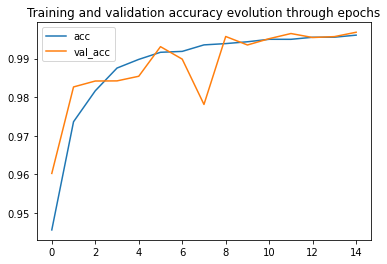

<Figure size 432x288 with 0 Axes>

In [47]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and validation accuracy evolution through epochs')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

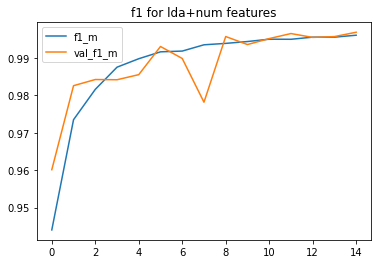

In [70]:
plt.plot(history.history['f1_m'], label='f1_m')
plt.plot(history.history['val_f1_m'], label='val_f1_m')
plt.title("f1 for lda+num features")
plt.legend()
plt.show()

In [49]:
model.evaluate(X_train,y_train)

3751/3751 [==============================] - 18s 5ms/step - loss: 0.0024 - accuracy: 0.9972 - f1_m: 0.9972


[0.002367870882153511, 0.9972007274627686, 0.9971966743469238]

# Prepare and try test set

In [51]:
test=pd.read_pickle(r'C:\Users\chriq\OneDrive\Documents\my_data\MLdata\test_set.zip' )

In [52]:
test['js_splitted']=test.js.apply(lambda x: x.split())

In [53]:
test.drop(columns='obfuscator_name',inplace=True)

In [54]:
input_list=test.js_splitted.values.tolist()

In [55]:
bow_corpus = [dictionary.doc2bow(doc) for doc in tqdm(input_list)]

100%|██████████████████████████████████████████████████████████████████████████| 37510/37510 [00:13<00:00, 2864.86it/s]


In [56]:
lda_rep=[lda_model.get_document_topics(i,minimum_probability=0.0) for i in tqdm(bow_corpus)]

100%|██████████████████████████████████████████████████████████████████████████| 37510/37510 [00:11<00:00, 3227.78it/s]


In [57]:
test['num_par']=test.apply(lambda x:x[2:-1].tolist(),axis=1)

In [58]:
test.num_par

162438    [1531, 309, 74, 0, 6, 0, 27, 15, 927, 408, 0.2...
121867    [138160, 28175, 2623, 24, 323, 395, 6361, 917,...
168134    [9437, 140, 706, 6, 122, 176, 433, 398, 5741, ...
139568    [7293, 1125, 566, 8, 20, 20, 113, 61, 4615, 14...
52426     [10712, 2566, 304, 6, 9, 407, 39, 189, 6288, 1...
                                ...                        
11199     [1367, 450, 54, 0, 4, 21, 17, 22, 624, 23, 0.3...
31062     [1047, 429, 4, 0, 0, 9, 28, 1, 443, 103, 0.409...
93141     [6060, 286, 149, 16, 16, 110, 77, 57, 4026, 30...
23958     [5010, 142, 10, 3, 0, 16, 16, 2, 4028, 2686, 0...
19293     [587, 105, 26, 2, 0, 11, 7, 6, 387, 4, 0.17887...
Name: num_par, Length: 37510, dtype: object

In [59]:
train_vecs=[]
for i in tqdm(lda_rep):
    vec=[x[1] for x in i]
    train_vecs.append(vec)
train_vecs

100%|████████████████████████████████████████████████████████████████████████| 37510/37510 [00:00<00:00, 604172.54it/s]


[[0.0017566317,
  0.0017566368,
  0.0017566293,
  0.0017566297,
  0.0017566314,
  0.0017566293,
  0.0017566307,
  0.9754072,
  0.0017566297,
  0.0017566317,
  0.0017566296,
  0.0017566305,
  0.0017566317,
  0.0017566301,
  0.0017566319],
 [0.062580496,
  1.0589411e-05,
  0.004285292,
  0.038961094,
  1.0589402e-05,
  1.0589376e-05,
  0.05073055,
  1.0589394e-05,
  1.0589402e-05,
  0.14398476,
  1.0589402e-05,
  1.0589398e-05,
  0.2188733,
  0.4776887,
  0.0028216713],
 [0.0010582177,
  0.0010582182,
  0.0010582177,
  0.0010582181,
  0.001058218,
  0.953965,
  0.0010582178,
  0.0010582178,
  0.0010582177,
  0.001058218,
  0.0010582177,
  0.0010582177,
  0.03227814,
  0.0010582177,
  0.0010582178],
 [0.0005340975,
  0.00053409743,
  0.061773594,
  0.00053409743,
  0.00053409766,
  0.00053409714,
  0.0005340982,
  0.9312831,
  0.00053409726,
  0.00053409796,
  0.0005340973,
  0.0005340973,
  0.0005340974,
  0.0005340973,
  0.00053409766],
 [0.00019791069,
  0.0001979105,
  0.047301996,
  

In [60]:
test['lda_rep']=train_vecs

In [61]:
test['nn_input']=test.lda_rep+test.num_par

In [64]:
labels=test.obfuscated_bool.to_numpy()
labels_onehot=pd.get_dummies(labels).values

In [65]:
labels_onehot

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [66]:
nn_input=np.array(test.nn_input.to_list())
nn_input[0]

array([1.75663165e-03, 1.75663678e-03, 1.75662932e-03, 1.75662967e-03,
       1.75663142e-03, 1.75662932e-03, 1.75663072e-03, 9.75407183e-01,
       1.75662967e-03, 1.75663165e-03, 1.75662956e-03, 1.75663049e-03,
       1.75663165e-03, 1.75663014e-03, 1.75663189e-03, 1.53100000e+03,
       3.09000000e+02, 7.40000000e+01, 0.00000000e+00, 6.00000000e+00,
       0.00000000e+00, 2.70000000e+01, 1.50000000e+01, 9.27000000e+02,
       4.08000000e+02, 2.01828870e-01, 6.05486610e-01, 2.66492489e-01,
       4.83344219e-02, 0.00000000e+00, 3.91900718e-03, 0.00000000e+00,
       1.76355323e-02, 9.79751796e-03])

In [67]:
print(f"mean: {nn_input.mean()}\nstd: {nn_input.std()}")
print(f"min: {nn_input.min()}\nmax: {nn_input.max()}")

mean: 1469.5023698619675
std: 35768.967492611955
min: 0.0
max: 11980306.0


In [68]:
model.evaluate(nn_input,labels_onehot)

1173/1173 [==============================] - 5s 5ms/step - loss: 0.0027 - accuracy: 0.9967 - f1_m: 0.9967


[0.0026668815407902002, 0.9966942071914673, 0.996710479259491]